In [250]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)


In [183]:
df=pd.read_csv('Cleaned_Dummy_Data.csv')

In [184]:
df.head()

,Unnamed: 0,Id,htmlbody_cleaned_data,Predicted_Class,clean,final_body,final_cleaned_body
0,0,02s1r00001acKkkAAE,"payment query good morning, thank you for your...",Others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,1,02s1r00001blgJyAAI,statement & queries please find attached up to...,Status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,2,02s1r00001blgcRAAQ,statement from oasis products vending services...,Others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...
3,3,02s1r00001blj0aAAA,"ees uk cis deductions hi, after speaking to sh...",Others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,4,02s1r00001blj6TAAQ,securitas invoice processed twice in error hi ...,Others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."


In [185]:
col =["Predicted_Class","final_cleaned_body"]

In [186]:
df = df[col]

In [187]:
df = df[pd.notnull(df['final_cleaned_body'])]

In [188]:
df.columns = ['Predicted_Class', 'final_cleaned_body']

In [189]:
# Create a new column 'category_id' with encoded categories 
df['category_id'] = df['Predicted_Class'].factorize()[0]
category_id_df = df[['Predicted_Class', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Predicted_Class']].values)

In [190]:
df

,Predicted_Class,final_cleaned_body,category_id
0,Others,"payment query , thank you for your remittance....",0
1,Status,statement & queries find attached up to stat...,1
2,Others,statement from oasis products vending services...,0
3,Others,"ees uk cis deductions hi, after speaking to sh...",0
4,Others,"securitas processed twice in error hi all, d...",0
5,Status,overdue for vendor advise on the payment of...,1
6,Others,problem hi supplier number problem cis sho...,0
7,Escalation,cis payment hi can you solve this problem reg...,2
8,Escalation,cis payment hi can you solve this problem reg...,2
9,Others,from control applications limited note the...,0


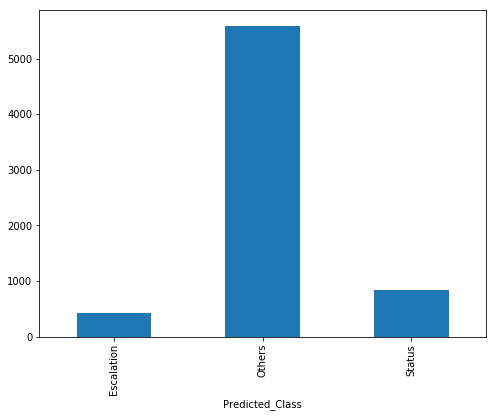

In [191]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Predicted_Class').final_cleaned_body.count().plot.bar(ylim=0)
plt.show()

In [192]:
#getting the features

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.final_cleaned_body).toarray()
labels = df.category_id

In [194]:
features.shape

(6851, 9271)

In [195]:
# hence a total of 9271 features 

In [196]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for Predicted_Class, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Predicted_Class))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Escalation':
  . Most correlated unigrams:
. hear
. kernick
. employees
. debt
. expressed
. despite
. risk
. privilege
. legal
. stop
  . Most correlated bigrams:
. use intended
. transmission intended
. pay employees
. sender message
. risk legal
. views expressed
. despite previous
. stop outstanding
. legal action
. account stop
# 'Others':
  . Most correlated unigrams:
. null
. receive
. confirmations
. confirm
. advise
. status
. overdue
. payment
. legal
. stop
  . Most correlated bigrams:
. legal action
. status missed
. paid appreciate
. appreciate send
. receive payment
. advise status
. send payment
. advise payment
. confirm payment
. account stop
# 'Status':
  . Most correlated unigrams:
. kindly
. missed
. reconciled
. expect
. overdue
. advise
. confirmations
. confirm
. payment
. status
  . Most correlated bigrams:
. informed unpaid
. send payment
. confirmations soon
. payment confirmations
. status missed
. paid appreciate
. appreciate send
. advise payment
. advis

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['final_cleaned_body'], df['Predicted_Class'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [198]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWar

In [200]:
print(accuracies)

[0.86608443 0.88064047 0.89650146 0.89941691 0.88905109 0.89766082
 0.90497076 0.90643275 0.90935673 0.90204678]


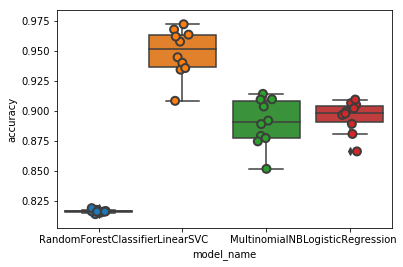

In [201]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [202]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.948635
LogisticRegression        0.895216
MultinomialNB             0.889949
RandomForestClassifier    0.816086
Name: accuracy, dtype: float64

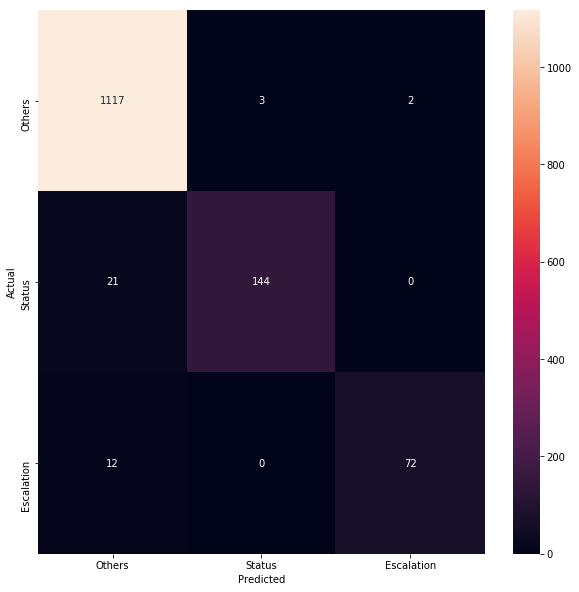

In [203]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Predicted_Class.values, yticklabels=category_id_df.Predicted_Class.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [226]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf =svm.LinearSVC()
scores=cross_val_score(clf,X_train,y_train,cv=10)


In [227]:
scores

array([0.97449909, 0.96903461, 0.96357013, 0.96715328, 0.96532847,
       0.97080292, 0.96350365, 0.98171846, 0.97074954, 0.96892139])

In [228]:

# The mean score and the 95% confidence interval of the score estimate are hence given by:

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.01)


In [229]:
from sklearn import metrics

In [230]:
scores = cross_val_score(clf,X_train,y_train, cv=10, scoring='f1_macro')

In [231]:
scores

array([0.94085247, 0.92546958, 0.93096878, 0.93885536, 0.92450766,
       0.93958788, 0.92377345, 0.96132943, 0.94308963, 0.93830612])

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {'C':np.arange(0.01,100,10)}

In [206]:
linearSVC = GridSearchCV(model,param_grid,cv=10,return_train_score=True)

In [207]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [208]:
linearSVC.fit(X_train,y_train)

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\s

C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\850044344\AppData\Local\Continuum\Anaconda3\lib\site-packages\s

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [209]:
linearSVC.best_params_


{'C': 10.01}

In [211]:
linearSVC.best_score_

0.9718978102189781

In [212]:
bestlinearSVC = linearSVC.best_estimator_

In [213]:
bestlinearSVC.fit(X_train,y_train)

LinearSVC(C=10.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [218]:
bestlinearSVC.score(X_train,y_train)

0.9992700729927008

In [240]:
test=bestlinearSVC.predict(X_test)
# bestlinearSVC.score(test,y_test)

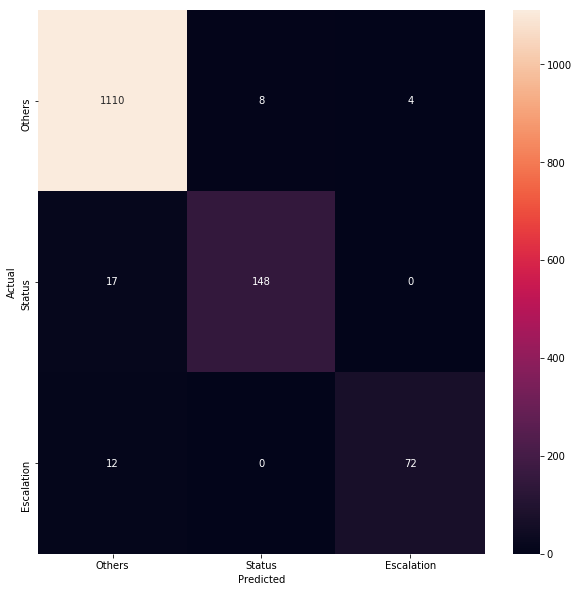

In [244]:
conf_mat = confusion_matrix(y_test, test)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Predicted_Class.values, yticklabels=category_id_df.Predicted_Class.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [251]:
accuracy_score(y_test,test)

0.9700948212983224

In [219]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],id_to_category[predicted],conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Predicted_Class','final_cleaned_body']])
            print('')

'Status' predicted as 'Others' : 21 examples.


,Predicted_Class,final_cleaned_body
5795,Status,"overdue - metal services ltd - , i am contac..."
6518,Status,galt s could you send the attached s to my po...
6629,Status,galt s could you send the attached s to my po...
48,Status,"kone plc - december s hi hayley, find attache..."
3078,Status,find attached the new s in gbp . advise me ...
6289,Status,copy attached manchester airport group hell...
6052,Status,acm systems uk is still incomplete hello cat...
3499,Status,copy see copy attached. can we expect a pa...
1376,Status,outstanding payment p.o hello can you help...
1724,Status,"shorts industries ltd overdue s hello, i have ..."


In [220]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Predicted_Class'].unique()))

              precision    recall  f1-score   support

      Others       0.97      1.00      0.98      1122
      Status       0.98      0.87      0.92       165
  Escalation       0.97      0.86      0.91        84

   micro avg       0.97      0.97      0.97      1371
   macro avg       0.97      0.91      0.94      1371
weighted avg       0.97      0.97      0.97      1371

